In [1]:
from trenchripper.utils import kymo_handle,pandas_hdf5_handler,writedir
from trenchripper.segment import phase_segmentation, phase_segmentation_cluster
from trenchripper.cluster import dask_controller
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import os
import h5py
import resource
%load_ext line_profiler
import random

In [2]:
import dask

In [3]:
headpath = "/n/scratch2/bj66/vibrio_37_balanced"

In [4]:
segmenter = phase_segmentation_cluster(headpath,
            seg_channel="Phase",init_niblack_k=-0.45,
            maxima_niblack_k=-0.8, init_smooth_sigma=4,
            maxima_smooth_sigma=3, init_niblack_window_size=13,
            maxima_niblack_window_size=13, min_cell_size=100,
            deviation_from_median=0.3, max_perc_contrast=97,
            wrap_pad=0

In [5]:
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)
metadata = kymodf.metadata

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [8]:
        kymodf = kymodf.reset_index()
        kymodf = kymodf.set_index(["File Index", "File Trench Index", "timepoints"])

In [ ]:
kymodf

In [5]:
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)
file_indices = kymodf["File Index"].unique().tolist()
random.shuffle(file_indices)
file_idx = 0

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [6]:
data = segmenter.load_trench_array_list(segmenter.kymographpath + "/kymograph_", file_idx, segmenter.seg_channel, True)

/home/bj66/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [7]:
data.shape

(5, 661, 590, 54)

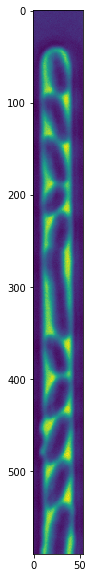

In [8]:
# trench = data[0,:]
trench = data[np.random.randint(data.shape[0]),:]
timepoint = np.random.randint(trench.shape[0])
img = trench[timepoint,:,:]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.imshow(img)

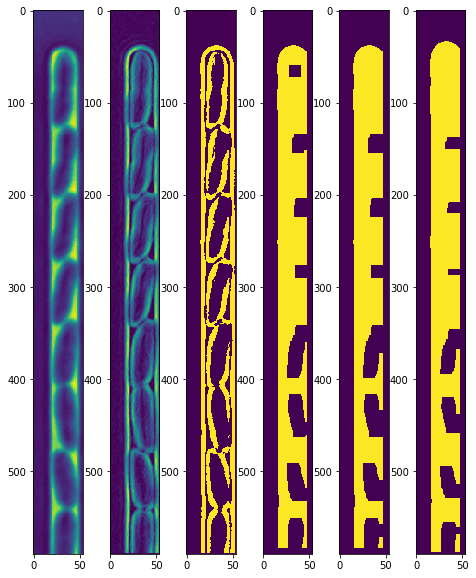

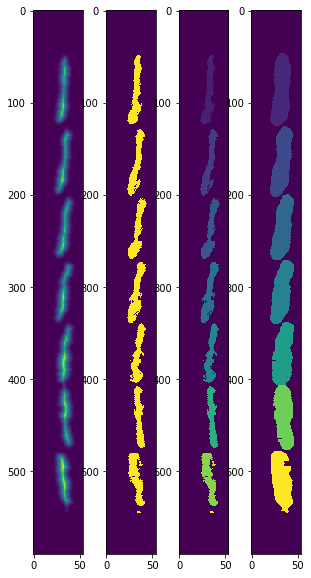

In [9]:
conn_comp, trench_masks, img_mask, maxima = segmenter.segment(img, return_all=True, show_plots=True)

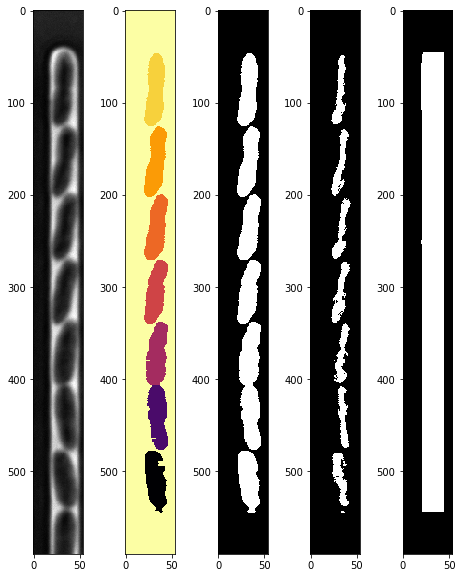

In [10]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(8,10))

ax1.imshow(img,cmap='gray')
ax2.imshow(conn_comp, cmap='inferno_r')
ax3.imshow(img_mask,cmap='gray')
ax4.imshow(maxima, cmap='gray')
if trench_masks is not None:
    ax5.imshow(trench_masks, cmap='gray')

In [5]:
dc = dask_controller(walltime='6:00:00',local=False,n_workers=50,memory='7.5GB',death_timeout=120.,working_directory=headpath+"/dask")
dc.startdask()
dc.daskcluster.start_workers()

In [6]:
dc.displaydashboard()

In [7]:
segmenter.dask_segment(dc)

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [15]:
dc.futures['Segmentation: 0'].result()

OSError: Unable to open file (truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048)

In [8]:
dc.shutdown()

Worker tcp://10.120.16.161:50840 restart in Job 54636525. This can be due to memory issue.
Worker tcp://10.120.17.75:39345 restart in Job 54636508. This can be due to memory issue.
Worker tcp://10.120.16.153:42261 restart in Job 54636538. This can be due to memory issue.
Worker tcp://10.120.16.153:56680 restart in Job 54636494. This can be due to memory issue.
Worker tcp://10.120.16.153:34109 restart in Job 54636495. This can be due to memory issue.
Worker tcp://10.120.16.88:57465 restart in Job 54636450. This can be due to memory issue.
Worker tcp://10.120.17.14:54070 restart in Job 54636426. This can be due to memory issue.
Worker tcp://10.120.16.88:46343 restart in Job 54636472. This can be due to memory issue.
Worker tcp://10.120.17.14:38316 restart in Job 54636419. This can be due to memory issue.
Worker tcp://10.120.17.14:46084 restart in Job 54636427. This can be due to memory issue.
Worker tcp://10.120.17.14:32944 restart in Job 54636425. This can be due to memory issue.
Worker

# Check results

In [9]:
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)
file_indices = kymodf["File Index"].unique().tolist()
random.shuffle(file_indices)
file_idx = file_indices[0]
with h5py.File(segmenter.phasesegmentationpath + "/segmentation_" + str(file_idx) + ".hdf5","r") as input_file:
    data = input_file["data"][:]


/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


File 482, Trench 1, Time 1011


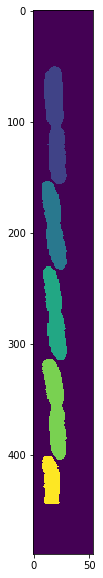

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/utils.py", line 656, in log_errors
    yield
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1267, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/utils.py", line 656, in log_errors
    yield
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 997, in _reconnect
    await self._close()
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1267, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError

In [11]:
trench_idx = np.random.randint(data.shape[0])
time_idx = np.random.randint(data.shape[1])
img = data[trench_idx, time_idx,:,:]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.imshow(img)
print("File %d, Trench %d, Time %d" %(file_idx, trench_idx, time_idx))

# Get loading fractions

In [12]:
dc = dask_controller(walltime='4:00:00',local=False,n_workers=40,memory='4GB',death_timeout=120.,working_directory=headpath+"/dask")
dc.startdask()
dc.daskcluster.start_workers()

In [13]:
dc.displaydashboard()

In [14]:
segmenter.dask_characterize_trench_loading(dc)

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [15]:
segmenter.dask_postprocess_trench_loading(dc)

In [16]:
trench_loadings = np.concatenate(dc.daskclient.gather(dc.futures["Trench Loading"]), axis=0)


(array([3.617370e+05, 1.251030e+05, 1.730730e+05, 2.799930e+05,
        1.015715e+06, 2.420314e+06, 2.817950e+05, 3.463000e+03,
        4.080000e+02, 3.990000e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

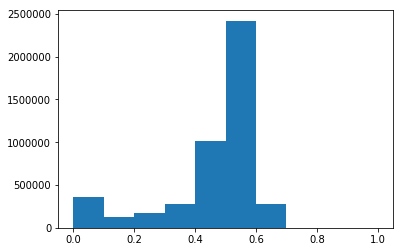

In [17]:
plt.hist(trench_loadings)

In [18]:
dc.shutdown()

Worker tcp://10.120.16.181:58719 restart in Job 54642300. This can be due to memory issue.
Worker tcp://10.120.16.181:48224 restart in Job 54642279. This can be due to memory issue.
Worker tcp://10.120.16.183:39131 restart in Job 54642280. This can be due to memory issue.
Worker tcp://10.120.17.12:56466 restart in Job 54642304. This can be due to memory issue.
Worker tcp://10.120.16.144:50968 restart in Job 54642274. This can be due to memory issue.
Worker tcp://10.120.16.244:43131 restart in Job 54642275. This can be due to memory issue.
Worker tcp://10.120.16.162:41745 restart in Job 54642302. This can be due to memory issue.
Worker tcp://10.120.16.180:38650 restart in Job 54642289. This can be due to memory issue.
Worker tcp://10.120.16.162:58650 restart in Job 54642303. This can be due to memory issue.
Worker tcp://10.120.16.180:49572 restart in Job 54642299. This can be due to memory issue.
Worker tcp://10.120.16.180:59982 restart in Job 54642290. This can be due to memory issue.


In [ ]:
fig1, ax1= plt.subplots(figsize=(10,10))

ax1.hist(trench_loadings, bins=40)
ax1.set_ylabel("Count")
ax1.set_xlabel("Loading fraction")

# Test get cell properties

In [ ]:
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)

In [ ]:
metadata = kymodf.metadata

In [ ]:
kymodf = kymodf.reset_index()
kymodf = kymodf.set_index(["File Index", "File Trench Index", "timepoints"])

In [ ]:
file_idx = np.random.randint(500)

In [ ]:
times = kymodf.loc[file_idx, "time (s)"]
global_trench_indices = kymodf.loc[file_idx, "trenchid"]
trench_loadings = kymodf.loc[file_idx, "Trench Loading"]

In [ ]:
writedir(segmenter.phasedatapath,overwrite=True)

In [ ]:
columns = ['area', 'centroid', 'label', 'major_axis_length', 'minor_axis_length']

In [ ]:
%lprun -f segmenter.extract_cell_data segmenter.extract_cell_data(file_idx, times, global_trench_indices, trench_loadings, columns, metadata)

In [ ]:
from pandas import HDFStore
store = HDFStore(os.path.join(segmenter.phasedatapath, "data_%d.h5" % file_idx))

In [ ]:
testdf = store.get("metrics")

In [ ]:
testdf.shape

# Get cell properties

In [31]:
headpath = "/n/scratch2/bj66/vibrio_30_MUX"
segmenter = phase_segmentation_cluster(headpath,
            seg_channel="Phase",init_niblack_k=-0.45,
            maxima_niblack_k=-0.8, init_smooth_sigma=4,
            maxima_smooth_sigma=3, init_niblack_window_size=13,
            maxima_niblack_window_size=13, min_cell_size=100,
            deviation_from_median=0.3, max_perc_contrast=97,
            wrap_pad=0)

In [32]:
dc = dask_controller(walltime='4:00:00',local=False,n_workers=50,memory='2GB',death_timeout=120.,working_directory=headpath+"/dask")
dc.startdask()
dc.daskcluster.start_workers()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/utils.py", line 656, in log_errors
    yield
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1267, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError
distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/utils.py", line 656, in log_errors
    yield
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 997, in _reconnect
    await self._close()
  File "/home/bj66/anaconda3/lib/python3.7/site-packages/distributed/client.py", line 1267, in _close
    await gen.with_timeout(timedelta(seconds=2), list(coroutines))
concurrent.futures._base.CancelledError

In [33]:
dc.displaydashboard()

In [34]:
columns = ['area', 'centroid', 'label', 'major_axis_length', 'minor_axis_length']
segmenter.dask_extract_cell_data(dc, columns)

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata


In [43]:
dc.shutdown()

Worker tcp://10.120.16.189:54498 restart in Job 54748283. This can be due to memory issue.
Worker tcp://10.120.16.184:39487 restart in Job 54748294. This can be due to memory issue.
Worker tcp://10.120.16.184:45749 restart in Job 54748313. This can be due to memory issue.
Worker tcp://10.120.16.184:58111 restart in Job 54748278. This can be due to memory issue.
Worker tcp://10.120.17.60:59427 restart in Job 54748301. This can be due to memory issue.
Worker tcp://10.120.16.188:46379 restart in Job 54748303. This can be due to memory issue.
Worker tcp://10.120.17.11:45719 restart in Job 54748315. This can be due to memory issue.
Worker tcp://10.120.17.11:60499 restart in Job 54748274. This can be due to memory issue.
Worker tcp://10.120.17.91:45597 restart in Job 54748321. This can be due to memory issue.
Worker tcp://10.120.17.91:51280 restart in Job 54748320. This can be due to memory issue.
Worker tcp://10.120.16.190:36089 restart in Job 54748284. This can be due to memory issue.
Work

In [ ]:
lost_count = 0
for key, value in dc.futures.items():
    if value.status == "lost":
        print(key)

# Check proprety extraction results

In [47]:
headpath = "/n/scratch2/bj66/vibrio_37_balanced"
segmenter = phase_segmentation_cluster(headpath,
            seg_channel="Phase",init_niblack_k=-0.45,
            maxima_niblack_k=-0.8, init_smooth_sigma=4,
            maxima_smooth_sigma=3, init_niblack_window_size=13,
            maxima_niblack_window_size=13, min_cell_size=100,
            deviation_from_median=0.3, max_perc_contrast=97,
            wrap_pad=0)

In [50]:
from pandas import HDFStore
import pandas as pd
import random
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)
file_indices = kymodf["File Index"].unique().tolist()
random.shuffle(file_indices)
file_idx = file_indices[0]
p = os.path.join(segmenter.phasedatapath, "data_%d.h5" % file_idx)
test_df = pd.read_hdf(p)

In [24]:
len(test_df.index.unique("time_s"))

1554

In [25]:
trenches = list(test_df.index.unique("file_trench_index"))
random.shuffle(trenches)
trench_idx = trenches[0]
time_idx = 0

In [26]:
# Show segmentation mask
with h5py.File(segmenter.phasesegmentationpath + "/segmentation_" + str(file_idx) + ".hdf5","r") as input_file:
    data = input_file["data"][:]

In [27]:
times = test_df.loc[trench_idx].index.unique("time_s")

In [28]:
test_df_refactored = test_df.reset_index().set_index(["file_trench_index", "trench_cell_index"])

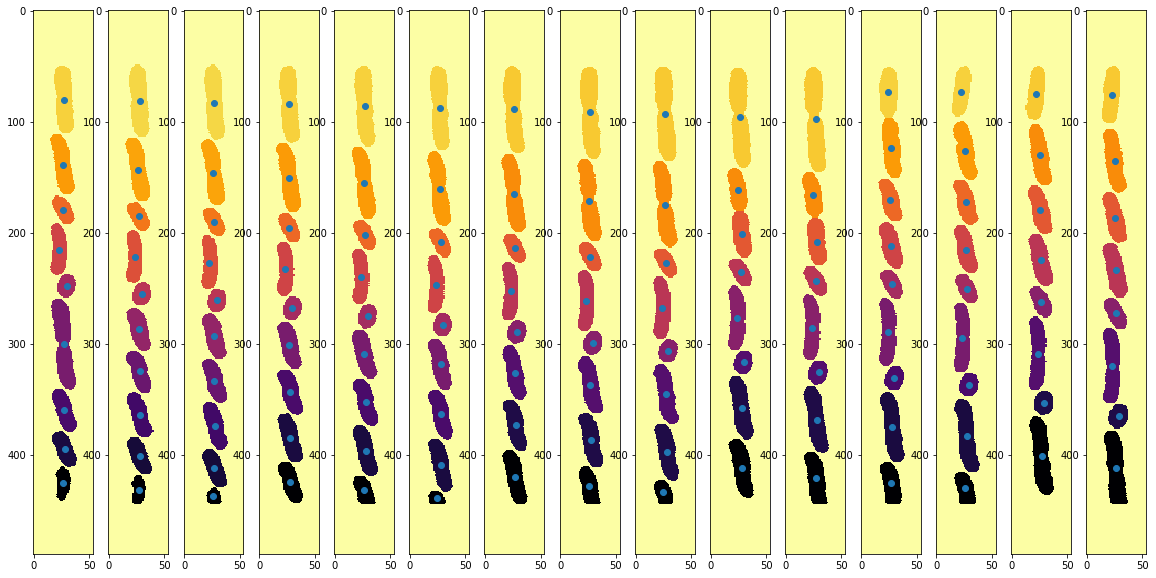

In [29]:
fig1, axes = plt.subplots(1, 15, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(data[trench_idx, time_idx+i,:,:], cmap="inferno_r")
    ax.scatter(test_df.loc[trench_idx, times[time_idx+i]]["centx"], test_df.loc[trench_idx, times[time_idx+i]]["centy"])

# Try lineage single-cell growth rates

# Get all growth properties

In [26]:
from trenchripper.tracking import mother_tracker
import pandas as pd
import os
from pandas import HDFStore

In [44]:
headpath = "/n/scratch2/bj66/vibrio_30_MUX"

In [45]:
tracker = mother_tracker(headpath)

In [46]:
tracker.save_all_growth_props()

/home/bj66/TrenchRipper/trenchripper/utils.py:91: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.metadata = store.get_storer(key).attrs.metadata
/home/bj66/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/home/bj66/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:940: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/home/bj66/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:940: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
distributed.client - 

In [40]:
growth_rates = pd.read_hdf(os.path.join(tracker.phasesegmentationpath, "growth_properties.h5"), "growth_rates")

In [41]:
growth_rates.head()

time  igr_length  igr_length_smoothed  igr_area  \
fov trenchid                                                          
0.0 0.0        60.175943    0.001861             0.009645  0.001726   
    0.0       120.156839    0.002177             0.002008  0.002043   
    0.0       180.166271    0.001986             0.001934  0.001901   
    0.0       240.158039    0.001640             0.001676  0.001232   
    0.0       300.153719    0.001400             0.001775  0.001127   

              igr_area_smoothed  igr_length_normed  \
fov trenchid                                         
0.0 0.0                0.006680           0.000620   
    0.0                0.001890           0.000694   
    0.0                0.001725           0.000609   
    0.0                0.001420           0.000486   
    0.0                0.001549           0.000405   

              igr_length_smoothed_normed  igr_area_normed  \
fov trenchid                                                
0.0 0.0                         0.003216         0.000662   
    0.0                         0.000641         0.000739   
    0.0                         0.000593         0.000667   
    0.0                         0.000497         0.000412   
    0.0                         0.000514         0.000376   

              igr_area_smoothed_normed  file_trench_idx  file_idx  
fov trenchid                                                       
0.0 0.0                       0.002563              0.0       0.0  
    0.0                       0.000684              0.0       0.0  
    0.0                       0.000605              0.0       0.0  
    0.0                       0.000475              0.0       0.0  
    0.0                       0.000516              0.0       0.0

In [42]:
growth_rates.index.unique("trenchid")

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,
              ...
              2908.0, 2909.0, 2910.0, 2911.0, 2912.0, 2913.0, 2914.0, 2915.0,
              2916.0, 2917.0],
             dtype='float64', name='trenchid', length=2909)

# Inspect trenches

In [4]:
headpath = "/n/scratch2/bj66/vibrio_37_balanced"
segmenter = phase_segmentation_cluster(headpath,
            seg_channel="Phase",init_niblack_k=-0.45,
            maxima_niblack_k=-0.8, init_smooth_sigma=4,
            maxima_smooth_sigma=3, init_niblack_window_size=13,
            maxima_niblack_window_size=13, min_cell_size=100,
            deviation_from_median=0.3, max_perc_contrast=97,
            wrap_pad=0)

In [10]:
from pandas import HDFStore
import pandas as pd
import random
kymodf = segmenter.meta_handle.read_df("kymograph",read_metadata=True)
file_indices = kymodf["File Index"].unique().tolist()
random.shuffle(file_indices)


In [16]:
file_idx = 229
trenchid = 1148
p = os.path.join(segmenter.phasedatapath, "data_%d.h5" % file_idx)
test_df = pd.read_hdf(p)
test_df  = test_df[test_df["trenchid"] == trenchid]

In [17]:
trench_idx = test_df.index.unique("file_trench_index")[0]
times = test_df.loc[trench_idx].index.unique("time_s")

In [18]:
# Show segmentation mask
with h5py.File(segmenter.phasesegmentationpath + "/segmentation_" + str(file_idx) + ".hdf5","r") as input_file:
    data = input_file["data"][trench_idx]

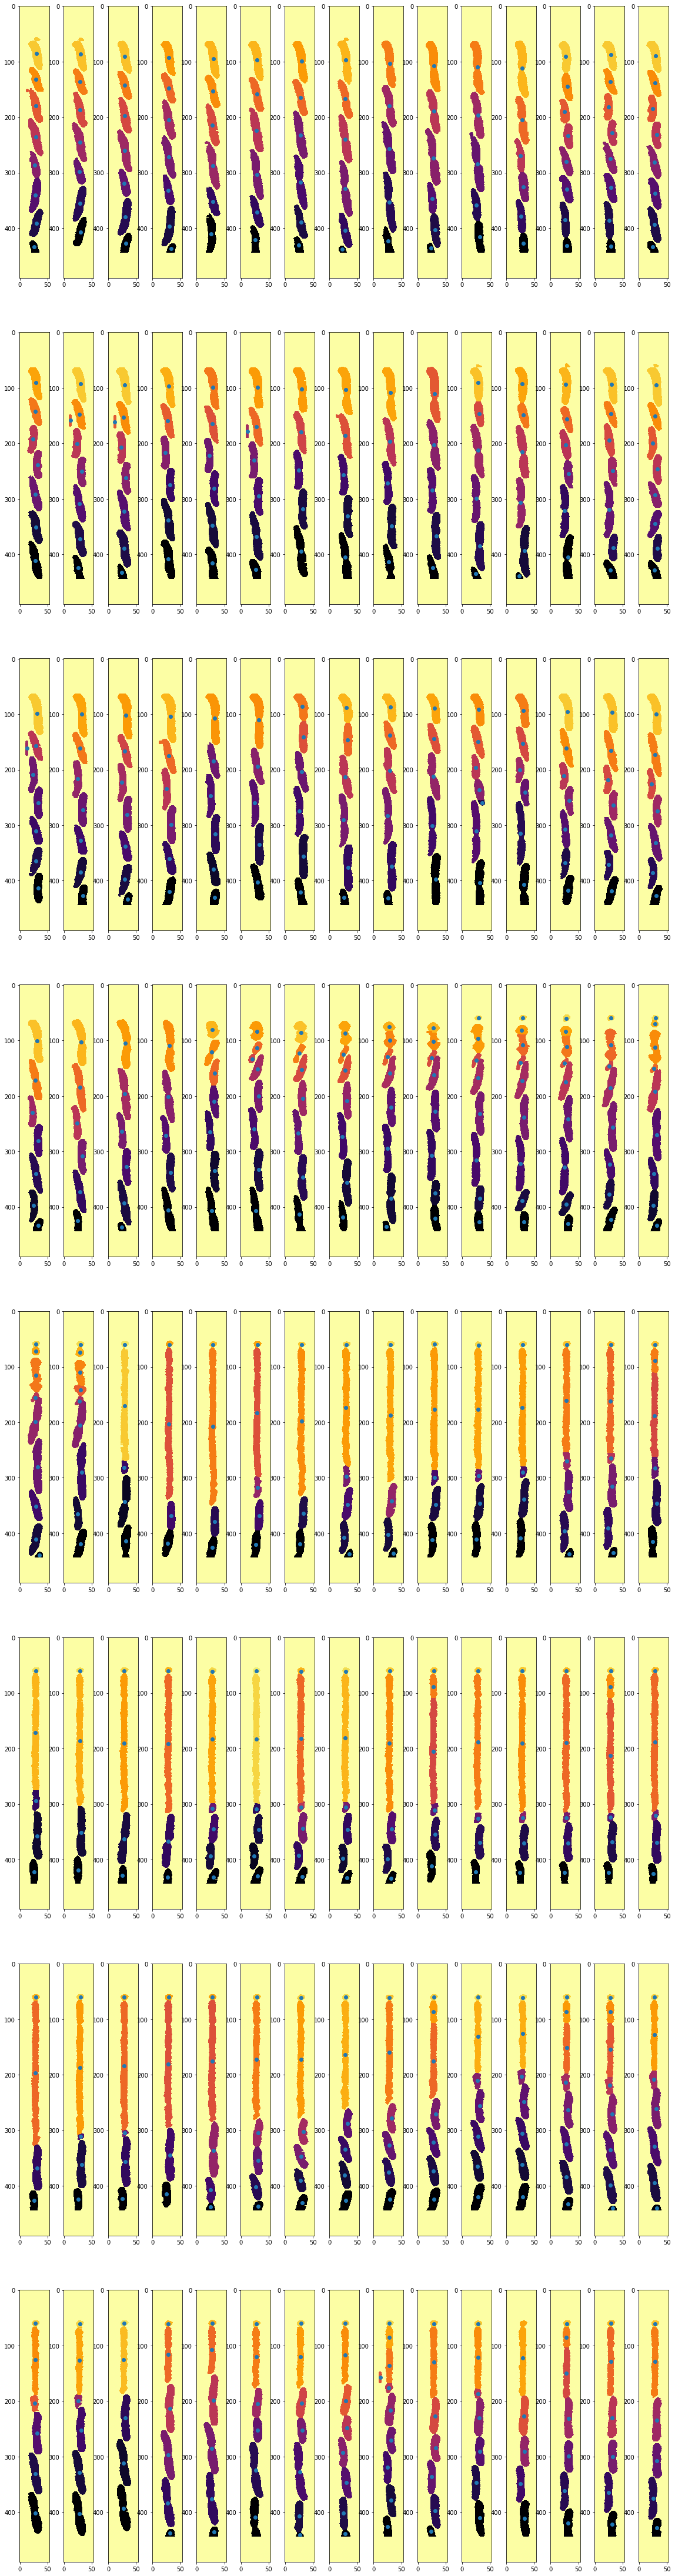

In [20]:
time_idx = 1050
n_rows = 8
fig1, axes = plt.subplots(1*n_rows, 15, figsize=(20, 10*n_rows))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(data[time_idx+i,:,:], cmap="inferno_r")
    ax.scatter(test_df.loc[trench_idx, times[time_idx+i]]["centx"], test_df.loc[trench_idx, times[time_idx+i]]["centy"])